In [33]:
include("DenseNTK.jl")
include("FastNTK.jl")

function eig_fix(K)
    eigen_values = eigen(K).values  # get eigenvalues of Kernel
    eigen_values_fixed = [val == 0 ? 1e-16 : val for val in eigen_values]  # add 10^-16 if eigenvalue is 0
    return eigen_values_fixed
end

eig_fix (generic function with 1 method)

In [3]:
Nx=300
a=-1.0; b=1.0

xVec=collect(range(a,stop=b,length=Nx));
yVec=sin.(2*pi*xVec) .+ 0.1*randn(size(xVec)); 

In [4]:
Nh = 1000
act = relu

model = Chain(DenseNTK(1,Nh,act),DenseNTK(Nh,1))

Chain(
  DenseNTK(Float32[-1.7366604; 0.46067154; … ; -0.38084424; -0.07343822;;], Float32[0.72265947, -0.2723894, 0.42651996, 0.710247, 0.7028378, -0.20276774, -0.1836459, 0.9482879, -0.12461431, -0.45864853  …  -0.5600849, 0.016323552, -0.8763486, -0.9760979, 0.13626362, -0.4051725, -0.73344254, -0.17576675, 0.65190995, -0.3838364], NNlib.relu),  # 2_000 parameters
  DenseNTK(Float32[1.7170801 0.35896614 … 0.29112193 -0.45236823], Float32[-0.7598475], identity),  # 1_001 parameters
)                   # Total: 4 arrays, 3_001 parameters, 12.020 KiB.

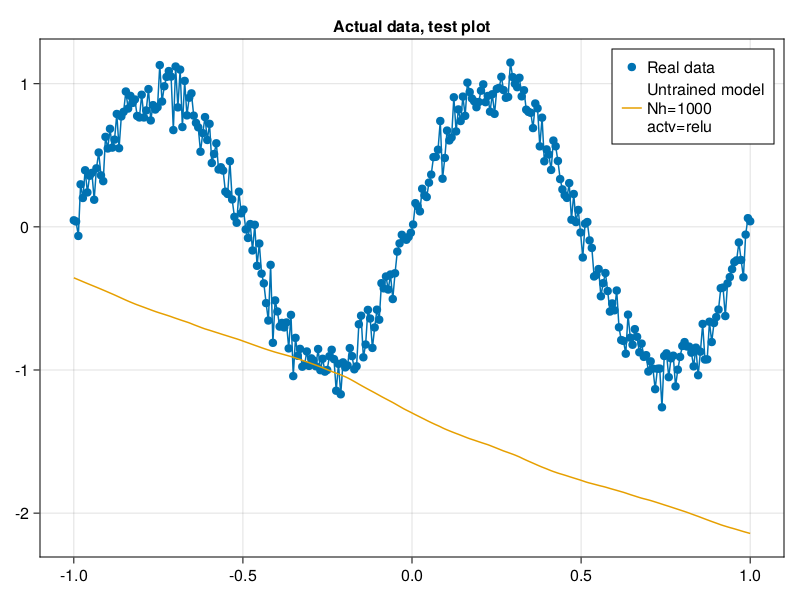

In [5]:
using CairoMakie

fig = Figure()
ax1 = Axis(fig[1,1],title="Actual data, test plot")

CairoMakie.lines!(xVec[:], yVec[:])
CairoMakie.scatter!(xVec[:], yVec[:], label="Real data")

CairoMakie.lines!(xVec[:], model(hcat(xVec...))[:], label="Untrained model\nNh=$Nh\nactv=$act")

axislegend(ax1,position=:rt)
fig

<h1>Trektin</h1>

In [9]:
using Distributions

a = -1.0;
b = 1.0;
Nx = 1
IN = 10

# Generate random matrix with numbers from a to b (inclusive)
xTrekt = rand(Uniform(-1,1),IN,Nx)

10×1 Matrix{Float64}:
  0.22869956099014743
 -0.5841270740264024
 -0.6595628779784726
  0.11306111713024247
 -0.2815656369994637
 -0.6368179041721831
 -0.751022162320105
  0.06477508688484179
  0.6725867503387666
  0.28200143291927393

In [10]:
OUT = 3
ACT = relu

trekt3 = Chain(DenseNTK(IN, 8, ACT), DenseNTK(8,7, ACT), DenseNTK(7,5,ACT), DenseNTK(5,OUT));

In [29]:
K_trekt3 = kernel(trekt3, xTrekt,true);


In [34]:
eig_trekt3 = eig_fix(K_trekt3)


9-element Vector{Float64}:
 1.0e-16
 1.0e-16
 1.0e-16
 1.0e-16
 1.0e-16
 1.0e-16
 2.165490487614022
 2.973198692346787
 4.20069334866461

9-element Vector{Float64}:
 1.0e-16
 1.0e-16
 1.0e-16
 1.0e-16
 1.0e-16
 1.0e-16
 2.165490487614022
 2.973198692346787
 4.20069334866461

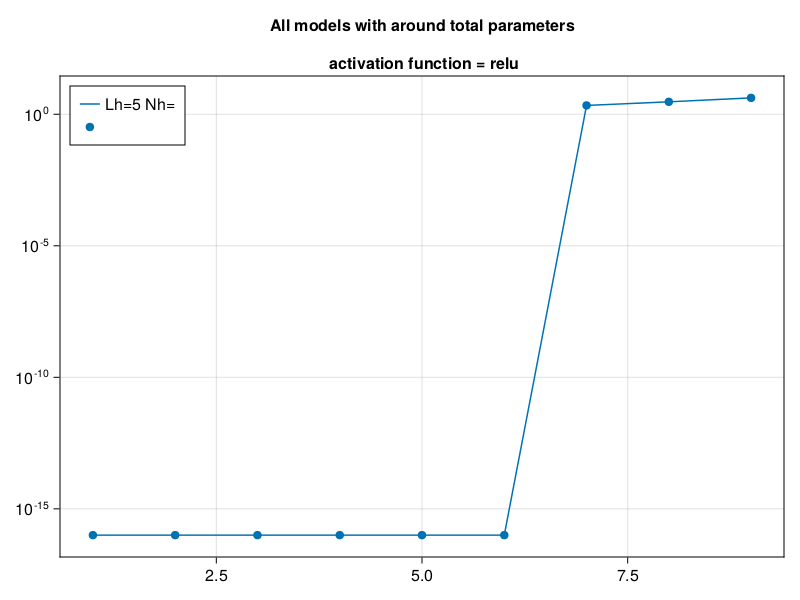

In [36]:
using CairoMakie

fig = Figure()
ax1 = Axis(fig[1,1], yscale=log10, title="All models with around total parameters\n\n activation function = relu")

CairoMakie.lines!(eig_trekt3, label="Lh=5 Nh=")
CairoMakie.scatter!(eig_trekt3, label="")

display(eig_trekt3)

axislegend(ax1,position=:lt)
fig